In [130]:
import time
import numpy
import sympy
import matplotlib.pyplot as plt
import pandas as pd
import jax

Question 1

We need to Perform a total of
n*m*k Multiplications and n*m*(k-1) additions for a matrix multiplication of a n x k and a k x m matrix




---



Question 2


Let assume that we have to multiply a 2X3 and 3X5 matrix

In [131]:
# Dimensions of the matrices
n = 2
k = 3
m = 5

# Using List of Lists
matrix1 = [[4, 3, 7], [8, 7, 1]]
matrix2 = [[7, 3, 2, 5, 9], [9, 7, 3, 5, 1], [8, 5, 3, 3, 1]]

# Initialize the result matrix with zeros
final = [[0 for _ in range(m)] for _ in range(n)]

# Matrix multiplication using nested loops
start_time = time.time()

for i in range(n):
    for j in range(m):
        for l in range(k):
            final[i][j] += matrix1[i][l] * matrix2[l][j]

end_time = time.time()

# Print the result
print("Result using nested loops:")
for row in final:
    print(row)

# Print the time taken
print(f"Time elapsed using nested loops: {round(end_time - start_time, 5)} seconds")

# Using Numpy
matrix1 = numpy.array(matrix1)
matrix2 = numpy.array(matrix2)

# Matrix multiplication using NumPy
start_time = time.time()
result = numpy.dot(matrix1, matrix2)
end_time = time.time()

# Print the result using NumPy
print("\nResult using NumPy:")
print(result)

# Print the time taken using NumPy
print(f"Time elapsed using NumPy: {round(end_time - start_time, 5)} seconds")

Result using nested loops:
[111, 68, 38, 56, 46]
[127, 78, 40, 78, 80]
Time elapsed using nested loops: 0.00023 seconds

Result using NumPy:
[[111  68  38  56  46]
 [127  78  40  78  80]]
Time elapsed using NumPy: 0.00014 seconds


We get a better time using numpy because numpy uses broadcasting which allows multiplication of two vectors without the use of extensive looping.



---



Question 3

Using this method the time for finding the median requires n/2 passes of the array which means O(n^2/2)

In [132]:
array = [1, 3, 7,4, 6, 8, 5]
k = len(array)
start_time = time.time()
for _ in range((len(array) // 2) + 1):
    max_index = 0
    for i in range(k):
        if array[i] > array[max_index]:
            max_index = i
    array[max_index], array[k - 1] = array[k - 1], array[max_index]
    k -= 1
median = array[k]
end_time = time.time()
time_taken = end_time - start_time

print("Median:", median)
print("Time Taken:", round(time_taken, 5), "seconds")


Median: 5
Time Taken: 0.00016 seconds


We can sort the array and find the middle Index of the Sorted array as median : O(nlog(n))

In [133]:
array = [1, 3, 7, 4, 6, 8, 5]

start_time = time.time()

array.sort()
median = array[len(array) // 2]

end_time = time.time()
time_taken = end_time - start_time
print("Median:", median)
print("Time Taken:", round(time_taken, 5), "seconds")


Median: 5
Time Taken: 0.00014 seconds


Using Median from numpy

In [134]:
array = [1, 3, 7, 4, 6, 8, 5]

start_time = time.time()

median = numpy.median(array)

end_time = time.time()
time_taken = end_time - start_time
print("Median:", median)
print("Time Taken:", round(time_taken, 5), "seconds")


Median: 5.0
Time Taken: 0.00042 seconds


Turns out that numpy.median() is the fastest of all



---



Question 4


In [135]:
import jax.numpy as jnp
from sympy import symbols, sin, diff, lambdify

x, y = symbols('x y')
f_sympy = (x**2) * y + sin(x) * y**3

gradient_x = diff(f_sympy, x)
gradient_y = diff(f_sympy, y)

print(f"Gradient with respect to x = δf/δx = {gradient_x}\nGradient with respect to y = δf/δy = {gradient_y}")

Gradient with respect to x = δf/δx = 2*x*y + y**3*cos(x)
Gradient with respect to y = δf/δy = x**2 + 3*y**2*sin(x)




---



Question 5, 6

In [136]:
# Convert symbolic expressions to numerical functions
f_sympy_numeric = lambdify((x, y), f_sympy)
gradient_x_numeric = lambdify((x, y), gradient_x)
gradient_y_numeric = lambdify((x, y), gradient_y)

# Define the function using JAX
def f_jax(x, y):
    return (x**2) * y + jnp.sin(x) * y**3

# Cast inputs to float32
x_gradients = numpy.random.randint(1, 21, size=10).astype('float32')
y_gradients = numpy.random.randint(1, 21, size=10).astype('float32')

# Compute the JAX gradients
jax_gradient = jax.grad(f_jax, argnums=(0, 1))

# Compare gradients
for i in range(10):
    result_jax = jax_gradient(x_gradients[i], y_gradients[i])
    result_sympy = (gradient_x_numeric(x_gradients[i], y_gradients[i]),
                    gradient_y_numeric(x_gradients[i], y_gradients[i]))

    if not numpy.allclose(result_jax, result_sympy):
        print("The results are different")
        break

print("\nBoth the gradients come out to be the same for random values of x and y")


Both the gradients come out to be the same for random values of x and y




---



Question 7

In [137]:
Batches = {
    2022:{
        "Branch 1":{
            "Roll Number":1,
            "Name":"N",
            "Marks":{
                "Maths" : 100,
                "English" : 70
            }
        },
        "Branch 2":{}
    },
    2023:{
        "Branch 1":{},
        "Branch 2":{}
    },
    2024:{
        "Branch 1":{},
        "Branch 2":{}
    },
    2025:{
        "Branch 1":{},
        "Branch 2":{}
    }
}



---



Question 8

In [138]:
class Database:
    def __init__(self):
        self.years = []

    def addyear(self, year):
        self.years.append(year)

    def __str__(self):
        years_str = '\n'.join(str(year) for year in self.years)
        return f"Database\n{years_str}"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def addbranches(self, branch):
        self.branches.append(branch)

    def __str__(self):
        branches_str = '\n'.join(f"  {branch}" for branch in self.branches)
        return f"{self.year}\n{branches_str}"

class Branch:
    def __init__(self, branch):
        self.branch = branch
        self.students = []

    def addstudent(self, student):
        self.students.append(student)

    def __str__(self):
        students_str = '\n'.join(f"    {student}" for student in self.students)
        return f"{self.branch}\n{students_str}"

class Student:
    def __init__(self, Rollno, Name, Marks):
        self.Name = Name
        self.Rollno = Rollno
        self.Marks = Marks

    def __str__(self):
        return f"Roll Number: {self.Rollno}, Name: {self.Name}, Marks: {self.Marks}"

db = Database()

# Adding data for the year 2022
year_2022 = Year(2022)
year_2023 = Year(2023)
year_2024 = Year(2024)
year_2025 = Year(2025)


branch_1_2022 = Branch("Branch 1")
branch_1_2022.addstudent(Student(1, "N", {"Maths": 100, "English": 70}))

branch_2_2022 = Branch("Branch 2")

year_2022.addbranches(branch_1_2022)
year_2022.addbranches(branch_2_2022)

branch_1_2023 = Branch("Branch 1")
branch_2_2023 = Branch("Branch 2")
year_2023.addbranches(branch_1_2023)
year_2023.addbranches(branch_2_2023)


branch_1_2024 = Branch("Branch 1")
branch_2_2024 = Branch("Branch 2")
year_2024.addbranches(branch_1_2024)
year_2024.addbranches(branch_2_2024)

branch_1_2025 = Branch("Branch 1")
branch_2_2025 = Branch("Branch 2")
year_2025.addbranches(branch_1_2025)
year_2025.addbranches(branch_2_2025)

db.addyear(year_2022)
db.addyear(year_2023)
db.addyear(year_2024)
db.addyear(year_2025)

# Displaying the database
print(db)


Database
2022
  Branch 1
    Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
  Branch 2

2023
  Branch 1

  Branch 2

2024
  Branch 1

  Branch 2

2025
  Branch 1

  Branch 2





---



Question 9


In [139]:
x_values = numpy.arange(0.5 , 100  ,0.5)
from numpy import sin,log,e

1) y = x

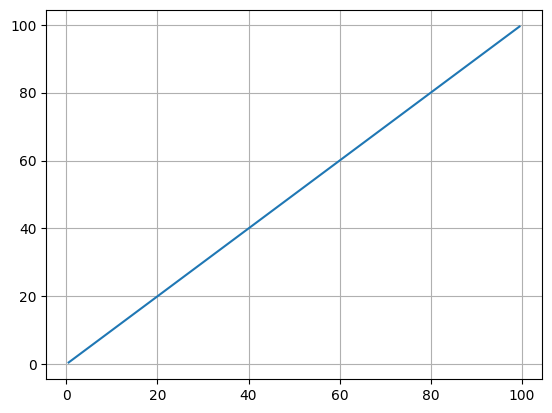

In [140]:
y_values = x_values
plt.grid()
plt.plot(x_values,y_values)
plt.show()

2) y = x^2

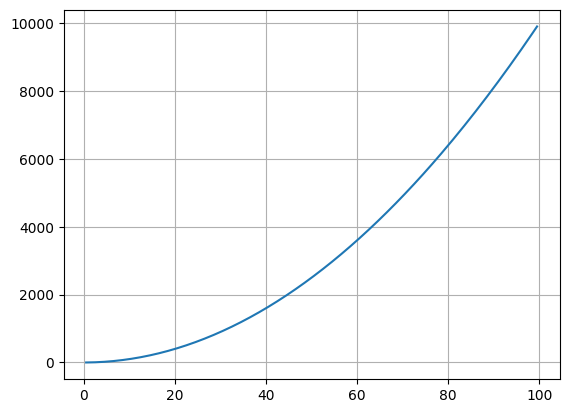

In [141]:
y_values = x_values**2
plt.grid()
plt.plot(x_values,y_values)
plt.show()

3) y = x^3/100

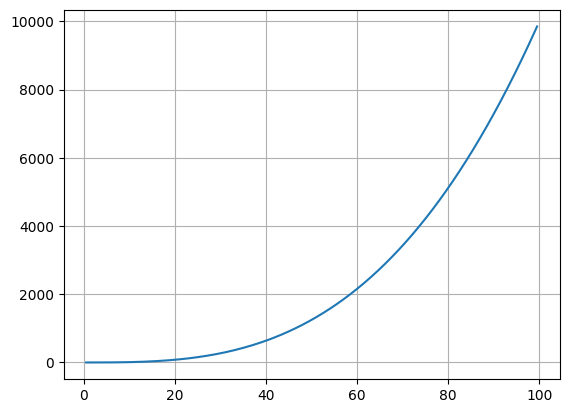

In [142]:
y_values = x_values**3/100
plt.grid()
plt.plot(x_values,y_values)
plt.show()

4) y = sin(x)

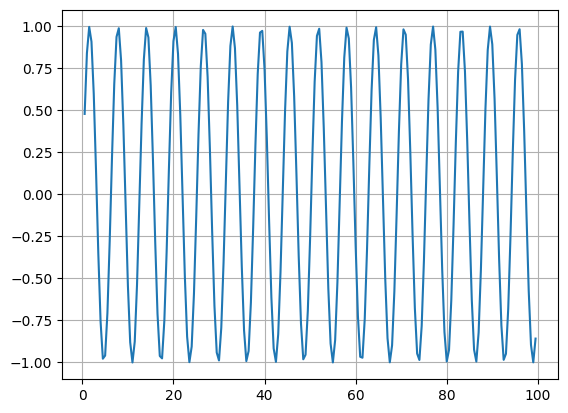

In [143]:
y_values = sin(x_values)
plt.grid()
plt.plot(x_values,y_values)
plt.show()

5) y = sin(x)/x

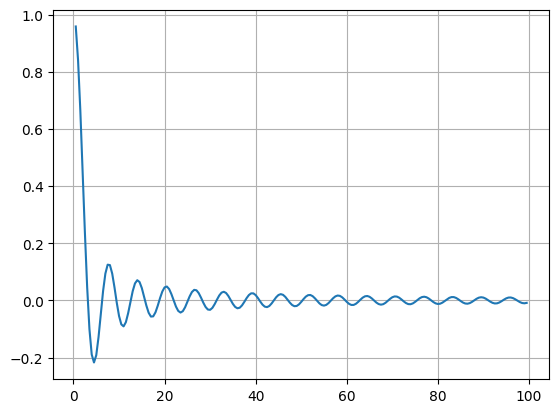

In [144]:
y_values = sin(x_values)/x_values
plt.grid()
plt.plot(x_values,y_values)
plt.show()

6) y = log(x)

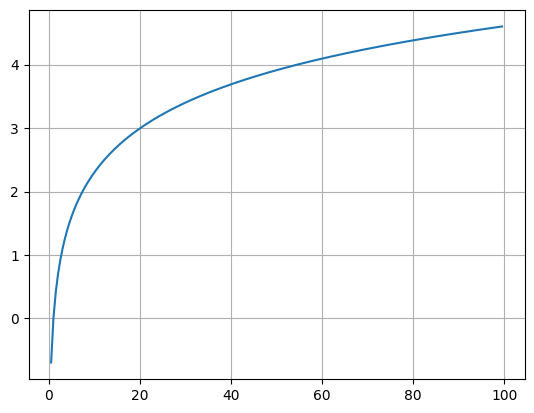

In [145]:
y_values = log(x_values)
plt.grid()
plt.plot(x_values,y_values)
plt.show()

7)y = e^x

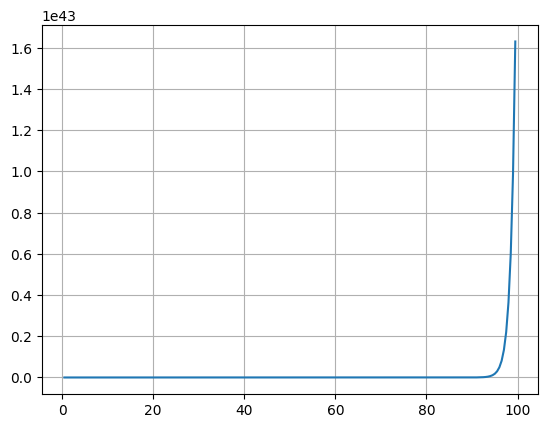

In [146]:
y_values = e**(x_values)
plt.grid()
plt.plot(x_values,y_values)
plt.show()



---



Question 10

In [147]:
matrix = numpy.random.uniform(1, 2, size=(20, 5))
names = ["a" , "b" , "c" , "d" , "e"]
df = pd.DataFrame(matrix , columns=names)

highstd = df.std().idxmax()
print(f"Column with the highest standard deviation: {highstd}")

lowmean = df.mean(axis=1).idxmin()
print(f"Row with the lowest mean: {lowmean}")

Column with the highest standard deviation: e
Row with the lowest mean: 16




---



Question 11

In [148]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = numpy.where(df['f'] < 8, 'LT8', 'GT8')

count = df[df['g'] == 'LT8'].shape[0]
print(f"Number of rows where 'g' is 'LT8': {count}")

# Calculate the standard deviation of column "f" for rows where "g" is "LT8" and "GT8"
stdlt8 = df.loc[df['g'] == 'LT8', 'f'].std()
stdgt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(f"Standard deviation of 'f' for 'LT8' rows: {stdlt8}")
print(f"Standard deviation of 'f' for 'GT8' rows: {stdgt8}")
print(df)

Number of rows where 'g' is 'LT8': 16
Standard deviation of 'f' for 'LT8' rows: 0.5726558855684494
Standard deviation of 'f' for 'GT8' rows: 0.22305562610383045
           a         b         c         d         e         f    g
0   1.483755  1.269911  1.539843  1.162014  1.841530  7.297052  LT8
1   1.846408  1.955236  1.154672  1.623333  1.474237  8.053886  GT8
2   1.344384  1.351540  1.412794  1.704926  1.598286  7.411929  LT8
3   1.459682  1.075933  1.077765  1.002339  1.967699  6.583419  LT8
4   1.005254  1.103094  1.314597  1.807430  1.962099  7.192473  LT8
5   1.790014  1.690560  1.521301  1.086705  1.958171  8.046750  GT8
6   1.758392  1.638949  1.759036  1.724103  1.637232  8.517713  GT8
7   1.980577  1.903364  1.646665  1.693175  1.051596  8.275377  GT8
8   1.669917  1.044165  1.588264  1.999353  1.555807  7.857507  LT8
9   1.473210  1.312855  1.120523  1.731024  1.192599  6.830210  LT8
10  1.115282  1.421763  1.795342  1.745065  1.054883  7.132334  LT8
11  1.455144  1.522435 



---



Question 12

In [149]:
array1 = numpy.array([1,3,2,4,5])
array2 = numpy.array([5,4,2,6,8])
array3 = numpy.array([[4,3,5,1,1],[6,5,3,7,7]])

print(f"This will add coresponding elements of the arrays to give a new array\n{array1+array2}")
print(f"This will multiply all number in the array1 by 5\n{array1*5}")
print(f"This will add all number in the array by 5\n{array1+5}")
print(f"This will multiply each element of array1 with the corresponding element of array2\n{array1*array2}")
print(f"This will make a copy of a row in array 1 to match the size of array 3 and then add them\n{array1+array3}")

This will add coresponding elements of the arrays to give a new array
[ 6  7  4 10 13]
This will multiply all number in the array1 by 5
[ 5 15 10 20 25]
This will add all number in the array by 5
[ 6  8  7  9 10]
This will multiply each element of array1 with the corresponding element of array2
[ 5 12  4 24 40]
This will make a copy of a row in array 1 to match the size of array 3 and then add them
[[ 5  6  7  5  6]
 [ 7  8  5 11 12]]




---



Question 13

In [150]:
def argmin(arr, axis=3):
    if not isinstance(arr, (list, np.ndarray)):
        raise ValueError("Input must be a list or a NumPy array")
    if axis == 3:
        min_val = float('inf')
        min_index = None
        for i, val in enumerate(arr):
            if val < min_val:
                min_val = val
                min_index = i

        return min_index
    else:
        if not isinstance(arr, np.ndarray):
            arr = np.array(arr)

        if axis == 0:
            result = np.argmin(arr, axis=axis)
        elif axis == 1:
            result = np.argmin(arr, axis=axis)
        else:
            raise ValueError("Invalid axis value. Only axis=0 and axis=1 are supported for 2D arrays.")

        return result.tolist()

# Example usage
print("For 1D Array-\n")
arr_1d = [4, 2, 7, 1, 5, 0]
min_index_1d = argmin(arr_1d)
print("Index of minimum value in the 1D array:", min_index_1d)

min_index = np.argmin(arr_1d)
print("Index of minimum value in the 1D array by Numpy:", min_index)

print("\nFor 2D Array-")
arr_2d = np.array([[4, 2, 7],
                   [1, 5, 0]])
min_indices_2d_axis0 = argmin(arr_2d, axis=0)
min_indices_2d_axis1 = argmin(arr_2d, axis=1)
print("\nIndices of minimum values along axis 0:", min_indices_2d_axis0)
print("Indices of minimum values along axis 1:", min_indices_2d_axis1)

#Verification
min_indices_axis_0 = np.argmin(arr_2d, axis=0)
min_indices_axis_1 = np.argmin(arr_2d, axis=1)

print("\nIndices of minimum values along axis 0 by numpy:", min_indices_axis_0)
print("Indices of minimum values along axis 1 by numpy:", min_indices_axis_1)

For 1D Array-

Index of minimum value in the 1D array: 5
Index of minimum value in the 1D array by Numpy: 5

For 2D Array-

Indices of minimum values along axis 0: [1, 0, 1]
Indices of minimum values along axis 1: [1, 2]

Indices of minimum values along axis 0 by numpy: [1 0 1]
Indices of minimum values along axis 1 by numpy: [1 2]
